# Análise Descritiva com Python

## Importação Bibliotecas

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('float_format', '{:.2f}'.format)

In [232]:
df = pd.read_excel('US Superstore data.xlsx')

In [233]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


## Entendimento dos Dados

In [234]:
df.shape

(9994, 21)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [236]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5457
Quantity           14
Discount           12
Profit           5157
dtype: int64

In [237]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [238]:
#Apagar colunas não necesssarias
apagar_colunas = ['Row ID', 'Country']
df = df.drop(apagar_colunas, axis = 1)

# Tópico 01 : Vendas e Desempenho dos Produtos

## Quantidade e valor vendido ao longo do tempo?

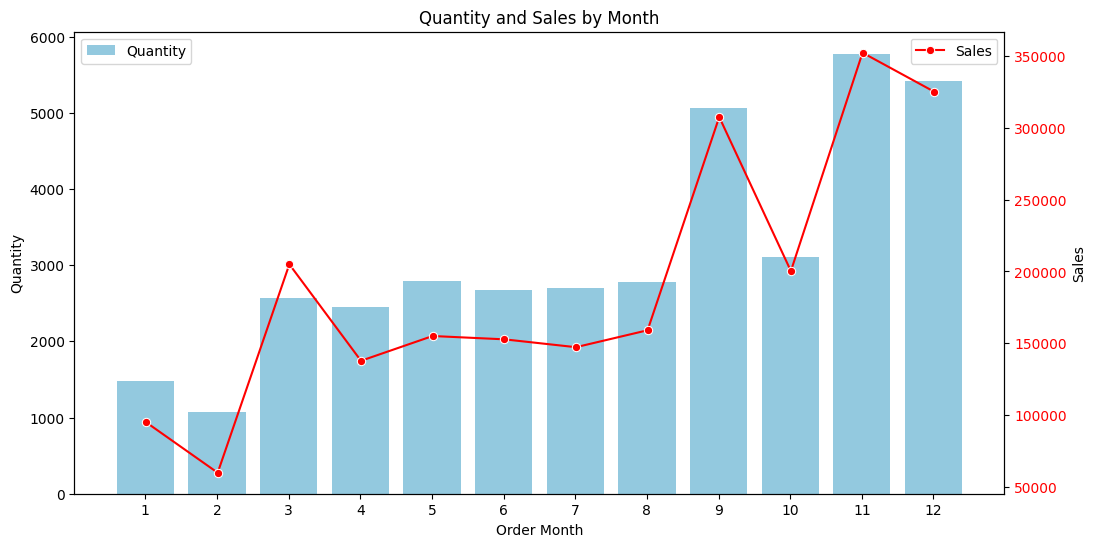

In [240]:
# Dados de quantidade de vendas e vendas totais por mês
df['Order Month'] = df['Order Date'].dt.month  # Extrair o mês da data de pedido
quantidade_vendas = df.groupby('Order Month')['Quantity'].sum().reset_index()
vendas_mensais = df.groupby('Order Month')['Sales'].sum().reset_index()

# Criar figura e eixo primário para quantidade
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para quantidade
sns.barplot(data=quantidade_vendas, x='Order Month', y='Quantity', color='skyblue', ax=ax1, label='Quantity')
ax1.tick_params(axis='y')

# Segundo eixo y para vendas
ax2 = ax1.twinx()
line_shift = 0.01  # Deslocamento no eixo x para o gráfico de linha
sns.lineplot(data=vendas_mensais, x=vendas_mensais.index + line_shift, y='Sales', color='red', marker='o', ax=ax2, label='Sales')
ax2.tick_params(axis='y', labelcolor='red')

# Ajuste de título e legendas
ax1.set_title('Quantity and Sales by Month')

plt.show()

## Top 10 Produtos mais vendidos em termos de quantidade.

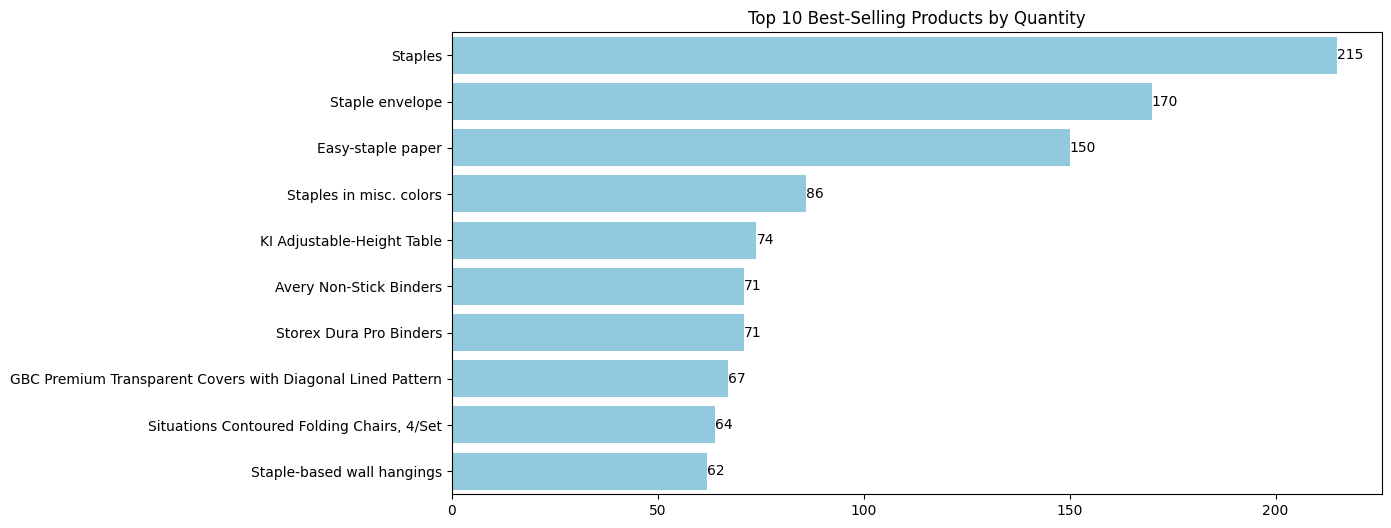

In [241]:
# Calcular quantidade de produtos vendidos por nome
quantidade_produtos = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=quantidade_produtos, y='Product Name', x='Quantity', color="skyblue")
plt.title('Top 10 Best-Selling Products by Quantity')

# Adicionar valores na extremidade das barras
for index, value in enumerate(quantidade_produtos['Quantity']):
    plt.text(value, index, f'{value:,.0f}', va='center')  # Ajustar a posição dos valores

plt.xlabel("")
plt.ylabel("")
plt.show()


## Top 10 Produtos com maiores receitas

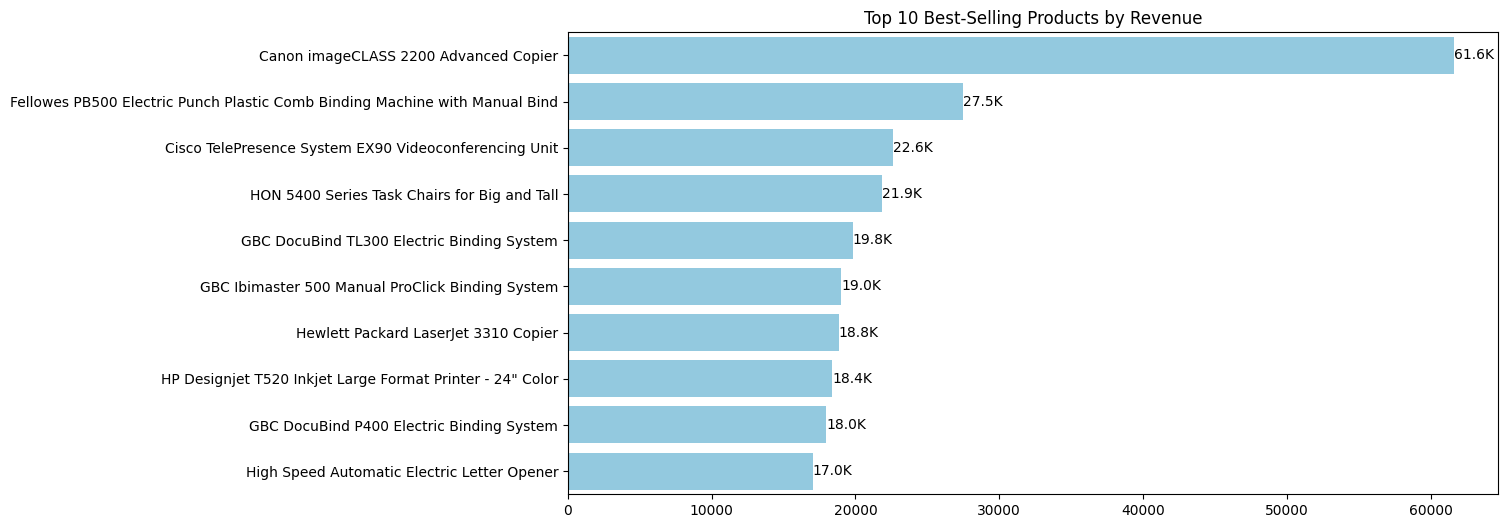

In [242]:
# Calcular receita por produto
receita = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)

# Criar a figura e o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=receita, y='Product Name', x='Sales', color="skyblue")
plt.title('Top 10 Best-Selling Products by Revenue')

# Adicionar valores na extremidade das barras, divididos por mil e com uma casa decimal
for index, value in enumerate(receita['Sales']):
    plt.text(value, index, f'{value / 1000:.1f}K', va='center')  # Divisão por mil e formatação

plt.xlabel("")
plt.ylabel("")
plt.show()


## Quantidade de vendas por Categoria

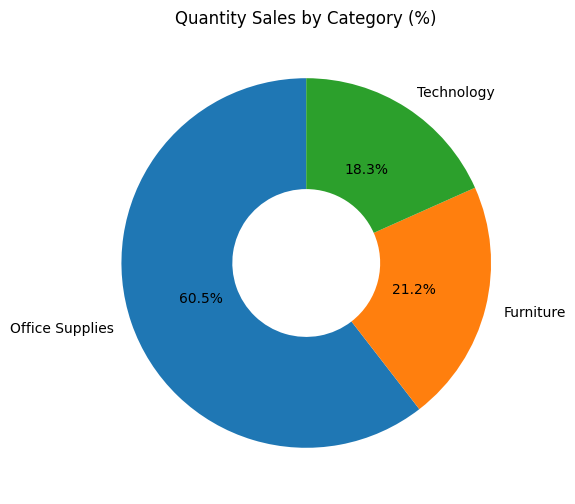

In [243]:
# Quantidade por categoria
quantidade_por_categoria = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).reset_index()

# Criar a figura e o gráfico de donut
fig, ax = plt.subplots(figsize=(6, 6))

# Gráfico de donut
ax.pie(
    quantidade_por_categoria['Quantity'], 
    labels=quantidade_por_categoria['Category'], 
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.6}  # Controla a largura do "anel"
)

# Título do gráfico
ax.set_title('Quantity Sales by Category (%)')

plt.show()


## Quantidade de vendas por Sub-Categoria

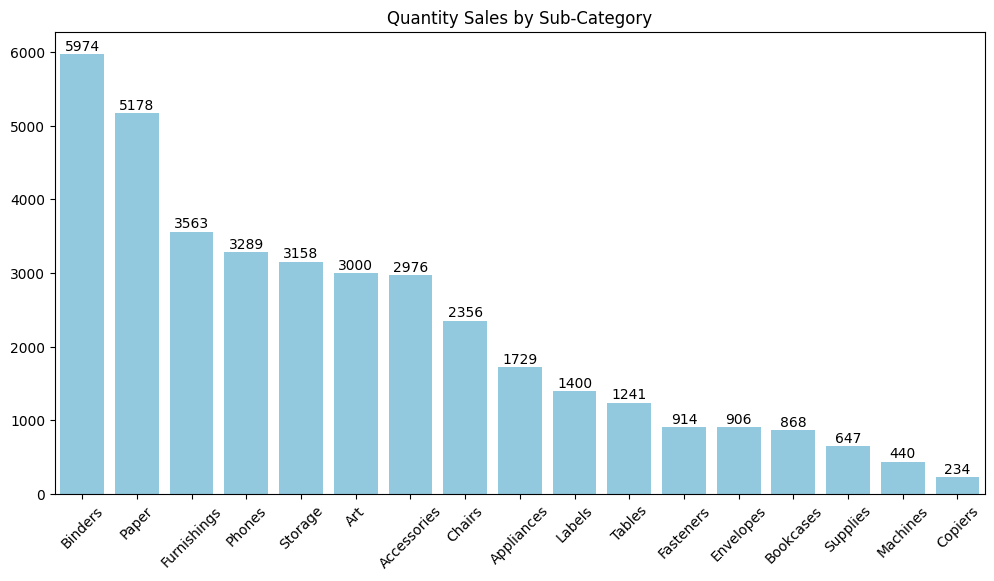

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quantidade vendida por subcategoria
quantidade_por_subcategoria = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).reset_index()

# Criar a figura e o gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=quantidade_por_subcategoria, x='Sub-Category', y='Quantity', color="skyblue")

# Adicionar os valores no topo de cada barra
for index, row in quantidade_por_subcategoria.iterrows():
    barplot.text(
        x=index, 
        y=row['Quantity'] + 0.001 * quantidade_por_subcategoria['Quantity'].max(), 
        s=f"{row['Quantity']:.0f}",  # Formatar sem casas decimais
        ha='center', va='bottom'
    )

# Título e ajustes nos eixos
plt.title('Quantity Sales by Sub-Category')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("")
plt.show()


## Qual o Lucro por Sub-Categoria?

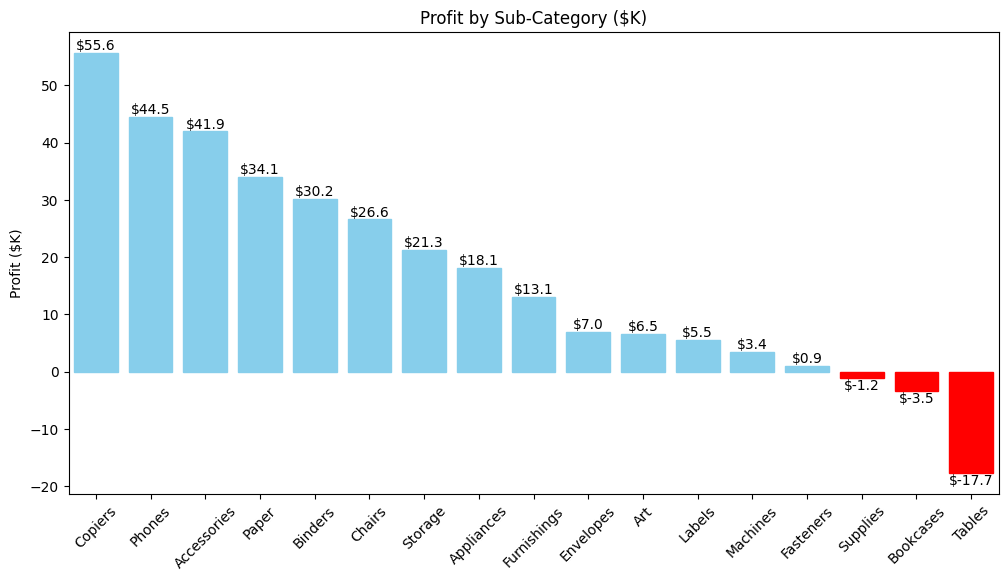

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e somar os lucros por subcategoria
lucro_subcategoria = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()

# Dividir o lucro por 1000
lucro_subcategoria['Profit'] = lucro_subcategoria['Profit'] / 1000

# Criar a figura e o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=lucro_subcategoria, x='Sub-Category', y='Profit', ax=ax)

# Ajustar cores para valores negativos e positivos e adicionar os valores
bars = ax.patches
for bar in bars:
    altura = bar.get_height()
    
    # Ajustar a cor da barra
    bar.set_color('red' if altura < 0 else 'skyblue')
    
    # Posicionar os valores no gráfico
    ax.text(
        x=bar.get_x() + bar.get_width() / 2, 
        y=altura + (0.001 if altura > 0 else -0.1),  # Ajuste de posição para valores positivos e negativos
        s=f"${altura:,.1f}",  # Formato monetário com uma casa decimal
        ha='center', va='bottom' if altura > 0 else 'top',  # Ajuste de alinhamento vertical
        color='black'
    )

# Título e ajustes nos eixos
plt.title('Profit by Sub-Category ($K)')  # Título ajustado para refletir valores em milhares
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Profit ($K)")  # Eixo Y ajustado para refletir a escala em milhares
plt.show()


## Top 10 Produtos mais lucrativos


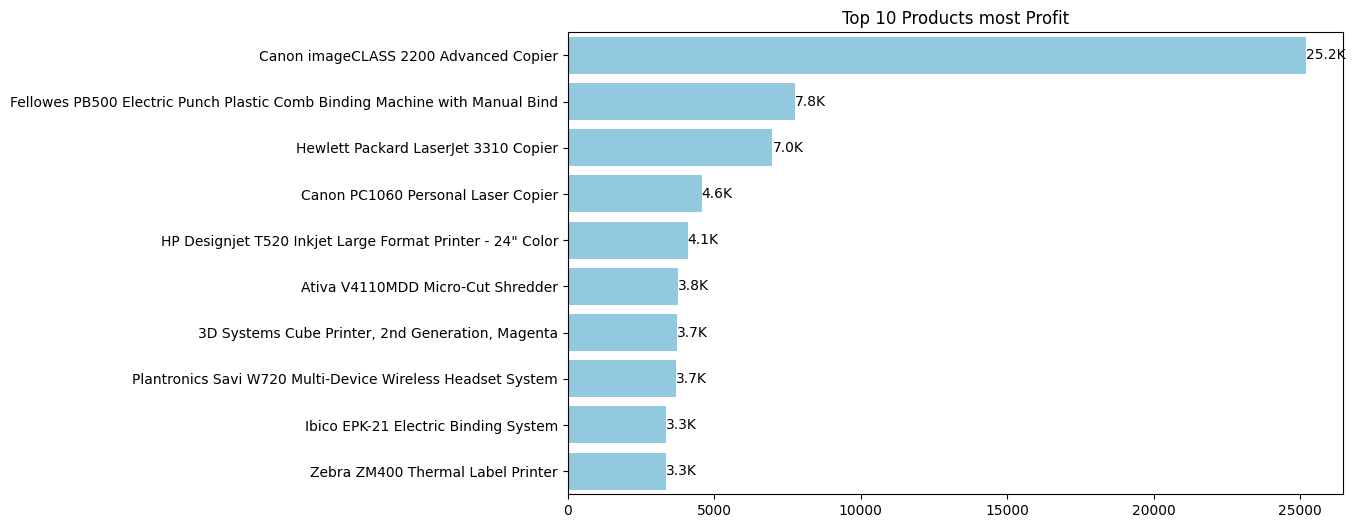

In [246]:
lucro_produto = df.groupby('Product Name')['Profit'].sum().sort_values(ascending = False).reset_index().head(10)

plt.figure(figsize = (10,6))
plt.title('Top 10 Products most Profit')
sns.barplot(data = lucro_produto, y = 'Product Name', x = 'Profit', color = "skyblue")

# Adicionar valores na extremidade das barras, divididos por mil e com uma casa decimal
for index, value in enumerate(lucro_produto['Profit']):
    plt.text(value, index, f'{value / 1000:.1f}K', va='center')  # Divisão por mil e formatação

plt.xlabel("")
plt.ylabel("")
plt.show()

## Quais são os produtos com maior margem de lucro mensal?


In [247]:
df['Profit Margin'] = (df['Profit']/df['Sales'])*100


margem_lucro = df.groupby('Order Month')[['Profit Margin','Product Name']].max().sort_values('Order Month').reset_index()
margem_lucro

,Order Month,Profit Margin,Product Name
0,1,50.02,netTALK DUO VoIP Telephone Service
1,2,50.00,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...
2,3,50.02,i.Sound Portable Power - 8000 mAh
3,4,50.01,iKross Bluetooth Portable Keyboard + Cell Phon...
4,5,50.02,netTALK DUO VoIP Telephone Service
5,6,50.00,netTALK DUO VoIP Telephone Service
6,7,50.01,netTALK DUO VoIP Telephone Service
7,8,50.00,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...
8,9,50.00,netTALK DUO VoIP Telephone Service
9,10,50.02,iOttie HLCRIO102 Car Mount


## Variação percentual do Lucro entre meses


In [248]:
aux1 = df.groupby('Order Month')['Profit'].sum().reset_index()


aux1['Profit_Percent'] = aux1['Profit'].pct_change() * 100

aux1

,Order Month,Profit,Profit_Percent
0,1,9134.48,NaN
1,2,10294.62,12.70
2,3,28594.64,177.76
3,4,11587.57,-59.48
4,5,22411.36,93.41
5,6,21285.87,-5.02
6,7,13832.75,-35.01
7,8,21777.07,57.43
8,9,36857.50,69.25
9,10,31784.20,-13.76


posx and posy should be finite values
posx and posy should be finite values


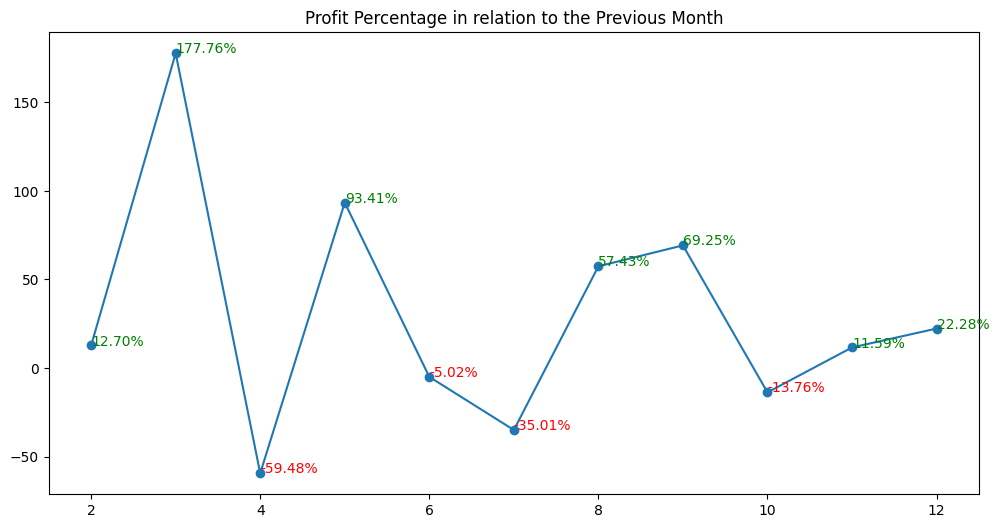

In [249]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(aux1['Order Month'], aux1['Profit_Percent'], marker='o')


# Adicionar as anotações de texto com os valores de variação
for i in range(len(aux1)):
    x = aux1['Order Month'][i]
    y = aux1['Profit_Percent'][i]
    color = 'red' if y < 0 else 'green'
    plt.text(x, y, f'{y:.2f}%', color=color)

    
plt.xlabel('')
plt.ylabel('')
plt.title('Profit Percentage in relation to the Previous Month')
plt.show()

## Existe uma correlação entre descontos oferecidos e vendas?


# Tópico 02: Segmentação de Clientes 

## Quais são os segmentos de clientes mais frequentes?


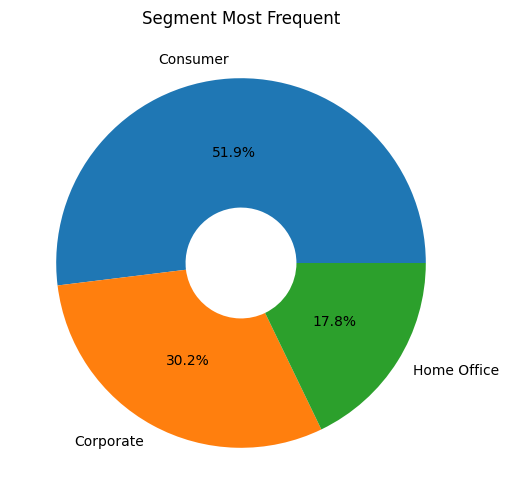

In [250]:
# Agrupar e contar a quantidade por segmento
seg = df.groupby('Segment')['Quantity'].count().reset_index()

# Criar a figura e o gráfico de rosca
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(seg['Quantity'], labels=seg['Segment'], autopct='%1.1f%%', wedgeprops={'width': 0.7})

# Título do gráfico
ax.set_title('Segment Most Frequent')

plt.show()

## Quais segmentos têm a maior quantidade e mais vendas?


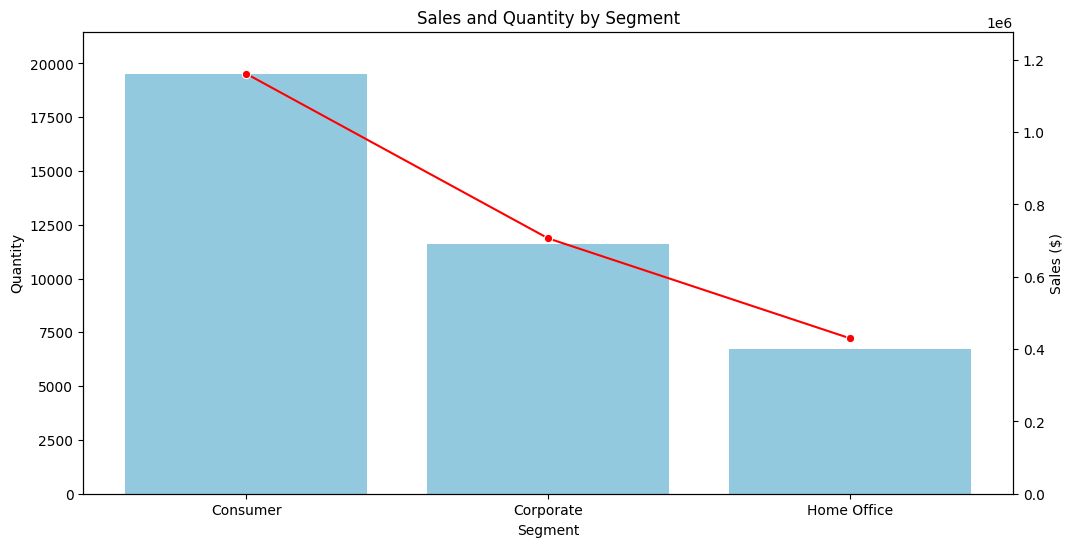

In [251]:
# Agrupamentos por segmento
vendas_segmento = df.groupby('Segment')['Sales'].sum().reset_index()
quantidade_por_segmento = df.groupby('Segment')['Quantity'].sum().reset_index()

# Mesclar os dados em um único DataFrame
dados_combinados = vendas_segmento.merge(quantidade_por_segmento, on='Segment')

# Configuração da figura e dos eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para Quantidade
sns.barplot(data=dados_combinados, x='Segment', y='Quantity', color="skyblue", ax=ax1)
ax1.set_ylabel('Quantity')
ax1.set_title('Sales and Quantity by Segment')

# Eixo secundário para o gráfico de linhas de vendas
ax2 = ax1.twinx()
sns.lineplot(data=dados_combinados, x='Segment', y='Sales', color="red", marker='o', ax=ax2)
ax2.set_ylabel('Sales ($)')

# Ajustar as proporções para alinhar os eixos
max_quantidade = dados_combinados['Quantity'].max()
max_vendas = dados_combinados['Sales'].max()
ax2.set_ylim(0, max_vendas * 1.1)
ax1.set_ylim(0, max_quantidade * 1.1)

# Exibir o gráfico
plt.show()


## Top 10 cidade com mais clientes?



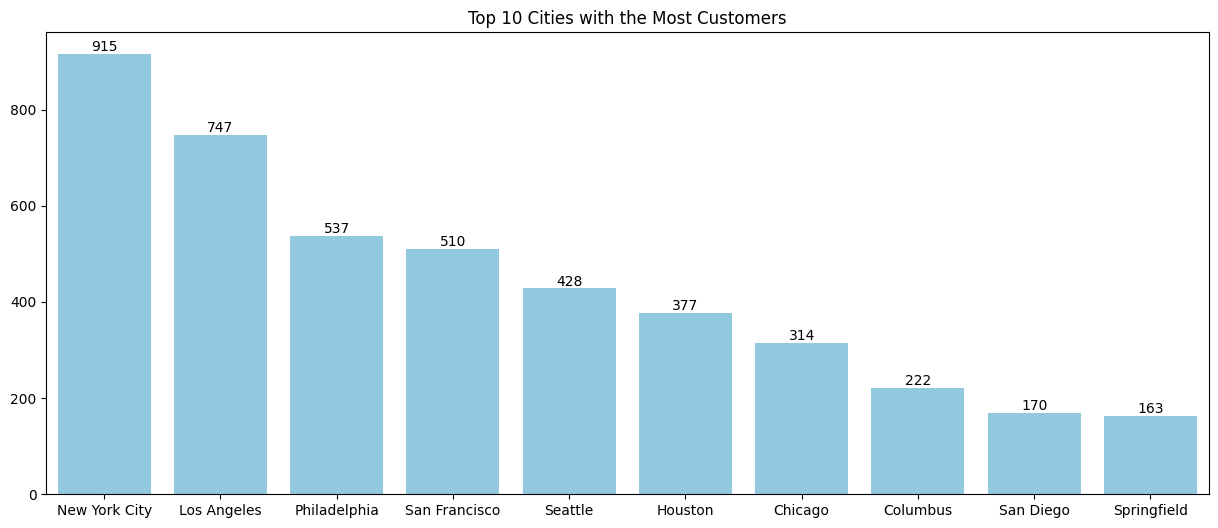

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados agrupados
clientes_por_cidade = df.groupby('City')['Customer ID'].count().sort_values(ascending=False).reset_index().head(10)

# Configuração da figura
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=clientes_por_cidade, x='City', y='Customer ID', color="skyblue")

# Adicionar os valores no topo de cada barra
for index, row in clientes_por_cidade.iterrows():
    ax.text(x=index, y=row['Customer ID'], s=f"{row['Customer ID']}", ha='center', va='bottom', fontsize=10)

# Título e ajustes nos eixos
plt.title('Top 10 Cities with the Most Customers')
plt.xlabel("")
plt.ylabel("")
plt.show()


## Top 10 estados com mais clientes

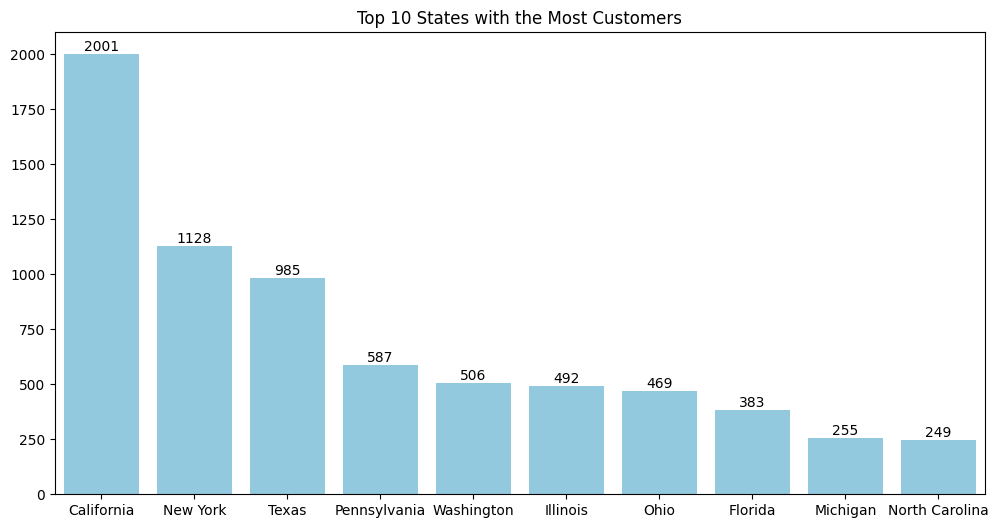

In [253]:
clientes_por_estados = df.groupby('State')['Customer ID'].count().sort_values(ascending = False).reset_index().head(10)

# Configuração da figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=clientes_por_estados, x='State', y='Customer ID', color="skyblue")


# Adicionar os valores no topo de cada barra
for index, row in clientes_por_estados.iterrows():
    ax.text(x=index, y=row['Customer ID'], s=f"{row['Customer ID']}", ha='center', va='bottom', fontsize=10)

plt.title('Top 10 States with the Most Customers')
plt.xlabel("")
plt.ylabel("")
plt.show()

## Qual a quantidade de vendas por Região?


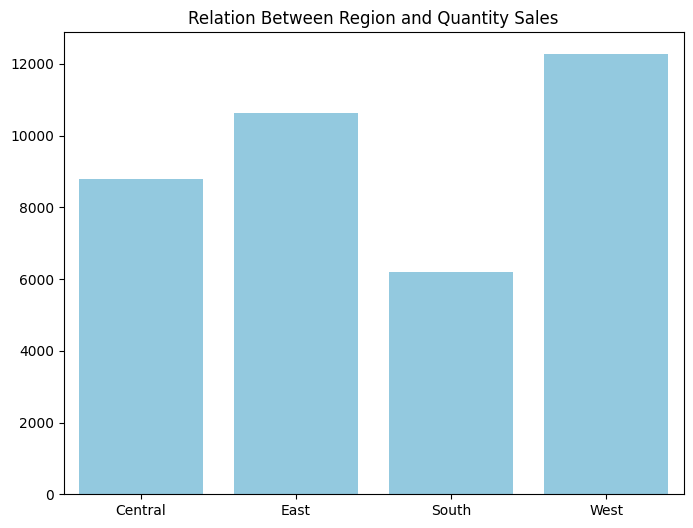

In [254]:
vendas_por_regiao = df.groupby('Region')['Quantity'].sum().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(data = vendas_por_regiao, x='Region', y='Quantity', color= "skyblue")
plt.title('Relation Between Region and Quantity Sales')
plt.xlabel("")
plt.ylabel("")
plt.show()


## Qual o desconto médio de cada segmento?


In [255]:
desconto_por_segmento = df.groupby('Segment')['Discount'].mean().sort_values().reset_index()
desconto_por_segmento['Discount'] = desconto_por_segmento['Discount']*100 #Discount in percent

desconto_por_segmento

,Segment,Discount
0,Home Office,14.71
1,Consumer,15.81
2,Corporate,15.82


## Qual o lucro médio de cada segmento?


In [256]:
lucro_medio_por_segmento = df.groupby('Segment')['Profit'].mean().sort_values().reset_index()
lucro_medio_por_segmento

,Segment,Profit
0,Consumer,25.84
1,Corporate,30.46
2,Home Office,33.82


## Qual o valor do ticket médio de cada segmento?


In [257]:

tm_por_segmento = df.groupby('Segment')['Sales'].mean().sort_values().reset_index()
tm_por_segmento


,Segment,Sales
0,Consumer,223.73
1,Corporate,233.82
2,Home Office,240.97


# Tópico 3: Eficiência de Remessa

## Quais são os tipos de envio mais comuns?


In [258]:
df.groupby('Ship Mode')['Order ID'].count().sort_values(ascending = False).reset_index()

,Ship Mode,Order ID
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


## Qual é o tempo médio de envio?

In [259]:
df['Sending Time'] = (df['Ship Date'] - df['Order Date']).dt.days


tempo_medio_envio = round(df['Sending Time'].mean())


print(f'O tempo médio de envio são de {tempo_medio_envio} dias')

O tempo médio de envio são de 4 dias


## Existe uma relação entre o tempo de envio e a quantidade de vendas?


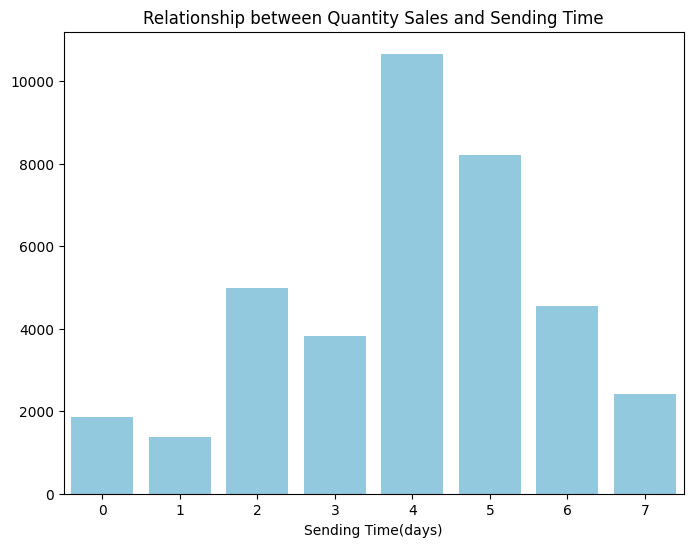

In [260]:

tempo_envio_quantidade = df.groupby('Sending Time')['Quantity'].sum().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(data = tempo_envio_quantidade, x='Sending Time', y='Quantity', color = "skyblue")
plt.title('Relationship between Quantity Sales and Sending Time')

plt.xlabel("Sending Time(days)")
plt.ylabel("")
plt.show()


## Quais são as cidades com o tempo medio de envio mais longos?


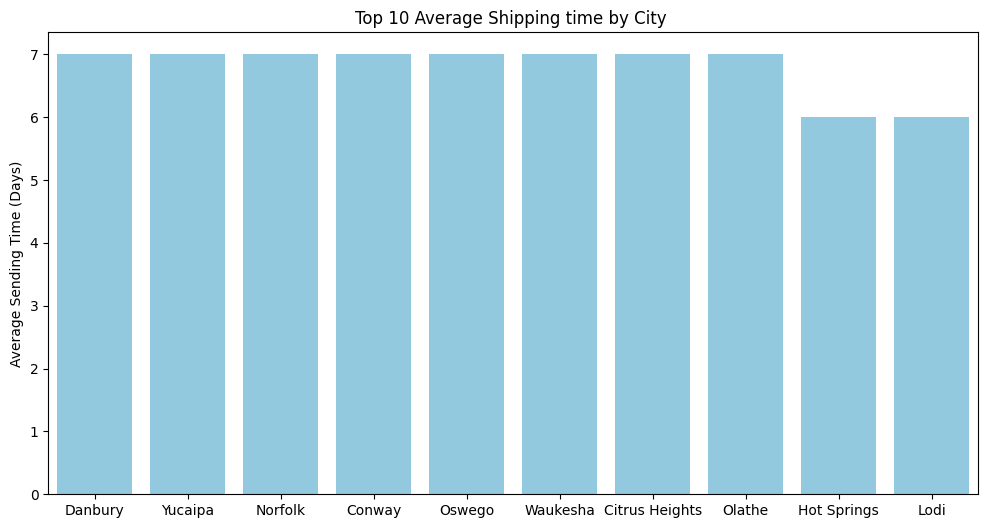

In [261]:
tempo_medio_envio_cidade = df.groupby('City')['Sending Time'].mean().sort_values(ascending = False).reset_index().head(10).round()


plt.figure(figsize=(12, 6))
sns.barplot(data = tempo_medio_envio_cidade, x='City', y='Sending Time', color = "skyblue")


plt.ylabel('Average Sending Time (Days)')
plt.title('Top 10 Average Shipping time by City ')
plt.xlabel("")
plt.show()


## Quais são as cidades com o tempo medio de envio mais curto?


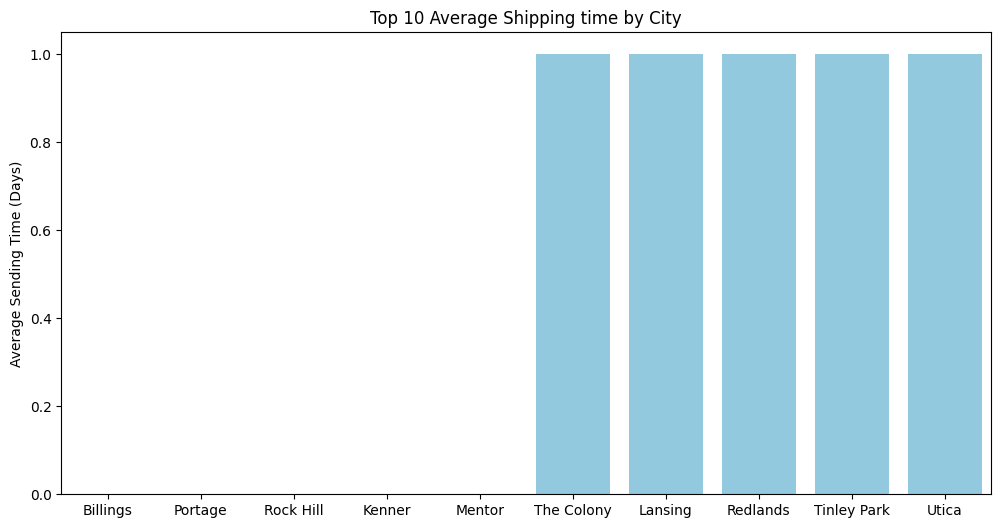

In [262]:
tempo_envio_curto = df.groupby('City')['Sending Time'].mean().sort_values().reset_index().head(10).round()


plt.figure(figsize=(12, 6))
sns.barplot(data = tempo_envio_curto, x='City', y='Sending Time', color = "skyblue")
plt.xlabel('City')
plt.ylabel('Average Sending Time (Days)')
plt.title('Top 10 Average Shipping time by City')
plt.xlabel("")
plt.show()


## Quais são os estados com o tempo medio de envio mais longos?


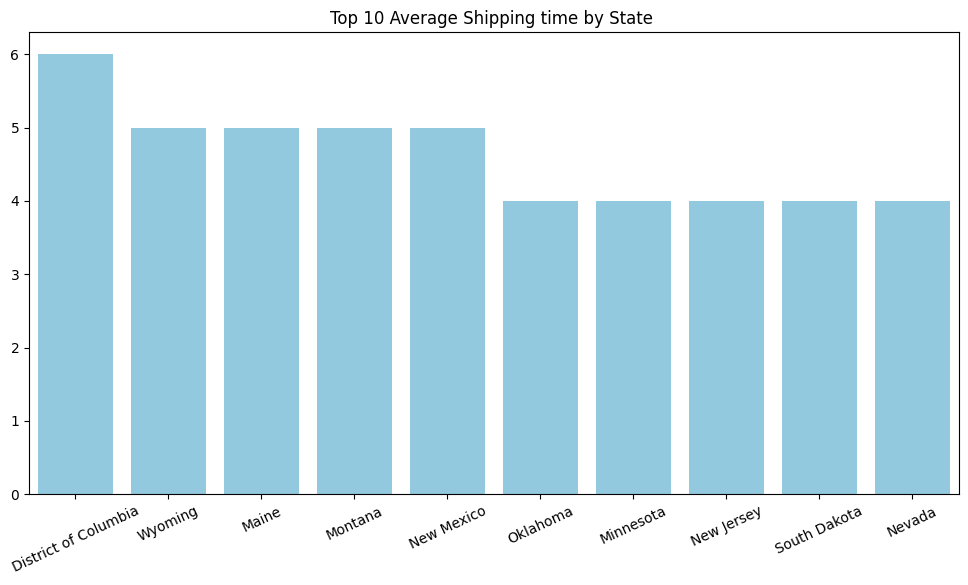

In [263]:

tempo_envio_longo_por_estado = df.groupby('State')['Sending Time'].mean().sort_values(ascending = False).reset_index().head(10).round()


plt.figure(figsize=(12, 6))
sns.barplot(data = tempo_envio_longo_por_estado, x='State', y='Sending Time', color = "skyblue")
plt.ylabel('Average Sending Time (Days)')
plt.title('Top 10 Average Shipping time by State ')
plt.xticks(rotation = 25)
plt.xlabel("")
plt.ylabel("")
plt.show()


## Quais são os estados com os tempos de remessa mais curtos?


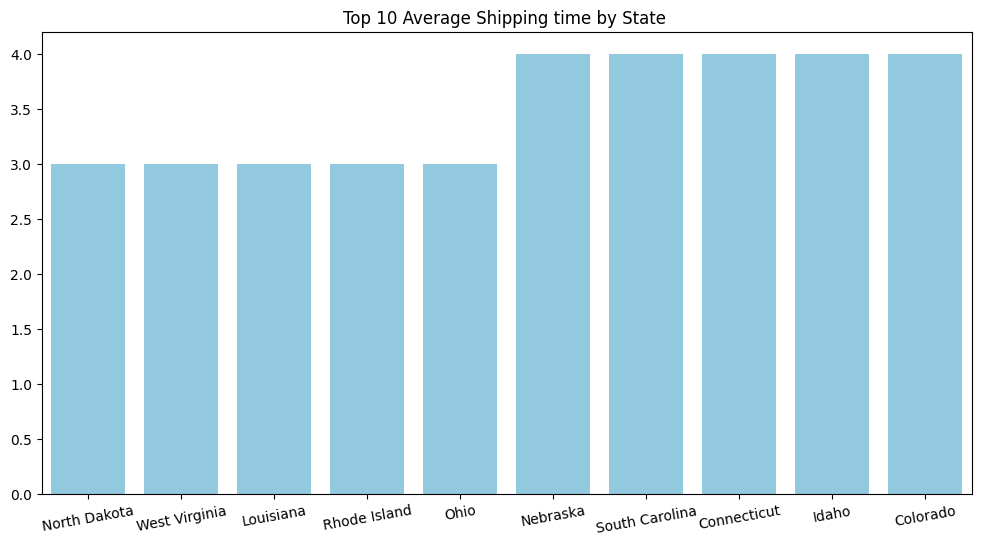

In [264]:

tempo_envio_curto_por_estado = df.groupby('State')['Sending Time'].mean().sort_values().reset_index().head(10).round()


plt.figure(figsize=(12, 6))
sns.barplot(data = tempo_envio_curto_por_estado, x='State', y='Sending Time', color = "skyblue")


plt.ylabel('Average Sending Time (Days)')
plt.title('Top 10 Average Shipping time by State ')
plt.xticks(rotation = 10)
plt.xlabel("")
plt.ylabel("")
plt.show()

## Quais são os tipos de envio mais lucrativos?


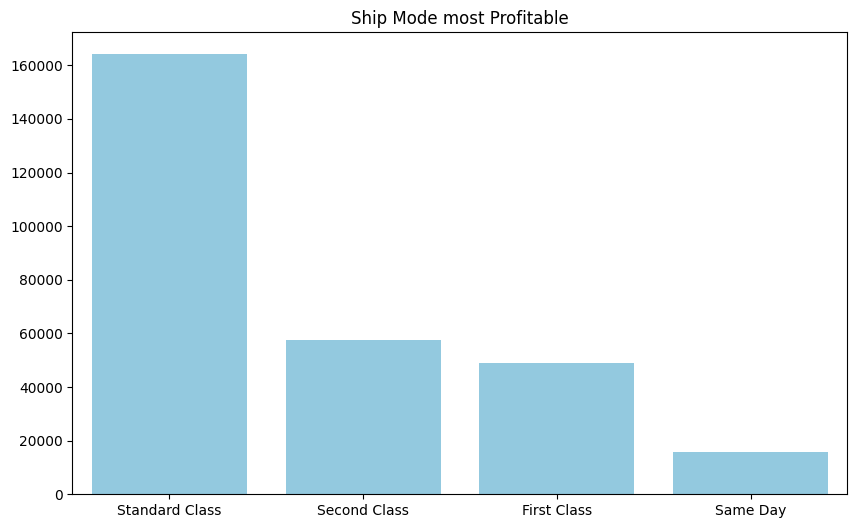

In [265]:
envios_mais_lucrativos = df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending = False).reset_index()
 
    
plt.figure(figsize=(10, 6))
sns.barplot(data = envios_mais_lucrativos, x='Ship Mode', y='Profit', color = "skyblue")
plt.title('Ship Mode most Profitable')
plt.xlabel("")
plt.ylabel("")
plt.show()

# Conclusão

##### Neste projeto, realizei uma análise aprofundada dos dados de vendas e desempenho de uma empresa de varejo, aplicando técnicas de agrupamento e visualização para entender padrões sazonais, impacto de produtos e eficiência de envio. A análise permitiu extrair insights sobre a segmentação de clientes e lucratividade, utilizando práticas de limpeza de dados e visualizações claras.

##### A conclusão detalhada, com recomendações específicas, está disponível no README do projeto, onde destaco estratégias baseadas nos dados analisados para melhorar as operações da empresa.